<a href="https://colab.research.google.com/github/gusti011/DSIII/blob/main/DSIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**: Este dataset agrupa tweets relacionados con el cambio climático recolectados entre el 27 de abril de 2015 y el 21 de febrero de 2018. En total, se anotaron 43,943 tweets. Cada tweet fue etiquetado independientemente por 3 revisores. Este dataset solo contiene los tweets en los que los 3 revisores estuvieron de acuerdo (el resto fueron descartados).

**Objetivo**

El objetivo del modelo es clasificar los tweets sobre el cambio climático en una de las tres etiquetas:

2: noticias - noticias factuales sobre el cambio climático.

1: pro - apoyan la creencia de que el cambio climático es causado por la humanidad.

0: neutral

-1: anti - rechazan la creencia de que el cambio climático es causado por la humanidad.

In [1]:
import pandas as pd

#Previamente cargamos  dataset en github para luego leerlo desde el notebbok
url = 'https://raw.githubusercontent.com/gusti011/DSIII/main/archive%20(1)/twitter_sentiment_data.csv'
df = pd.read_csv(url)

df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
# Value counts for the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
1,22962
2,9276
0,7715
-1,3990


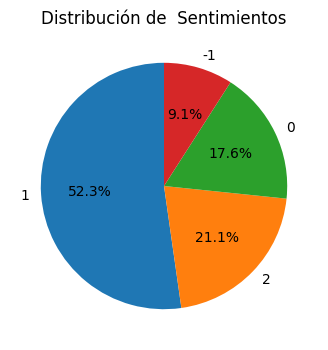

In [7]:
import matplotlib.pyplot as plt

# contamos valores de sentimientos
sentiment_counts = df['sentiment'].value_counts()

# Creamos un pie chart
plt.figure(figsize=(4, 4))  # Adjust figure size if needed
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de  Sentimientos')
plt.show()

La diferencia significativa en el número de tweets para cada clase de sentimiento indica que el dataset está desbalanceado. Esto podría afectar el rendimiento del modelo

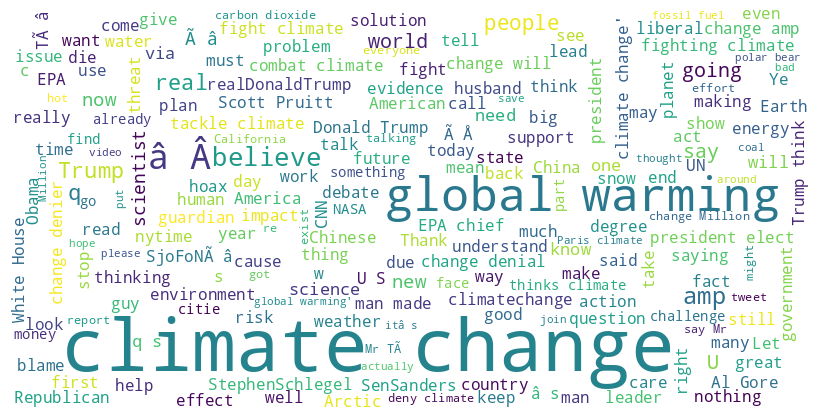

In [10]:
# prompt: nube de palabras message, incluir en stpowors "Https", tm CO, RT

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Existing code (assuming df is already loaded as in the provided example)

# Combine all tweets into a single string
text = " ".join(df['message'].astype(str))

# Custom stopwords
stopwords = set(STOPWORDS)
stopwords.update(["https", "tm", "co", "rt", "RT", "t"]) #Added stopwords


# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()